# A small process network modeled through neural ordinary differential equations

Most recent advances in the machine learning domain pose the challenge of how to naturally integrate new data-driven methods with classical process models and control. We propose a process modeling framework enabling integration of data-driven algorithms through consistent topological properties and conservation of extensive quantities. Interconnections among process network units are represented through connectivity matrices and network graphs. We derive the system's natural objective function equivalent to the non-equilibrium entropy production in a steady state system as a driving force for the process dynamics. We illustrate how distributed control and optimization can be implemented into process network structures and how control laws and algorithms alter the system's natural equilibrium towards engineered objectives. The basic requirement is that the flow conditions can be expressed in terms of conic sector (passivity) conditions. Our formalism allows integration of fundamental conservation properties from topology with learned dynamic relations from data through machine learning type algorithms.

We demonstrate in a practical example of a simple inventory control system in form of a pipeline network how to integrate the basic topology of a process with a neural network ordinary differential equation model. The system specific constitutive equations are left undescribed and learned by the deep neural network using the adjoint method in combination with an adaptive ODE solver from synthetic time-series data. The resulting neural network forms a state space model for use in a model predictive control algorithm.

A small pipeline network example shows how a consistent neural network based model can be derived in which the topology and conservation laws are embedded in the neural network. The network consists of two connected pipelines where each pipeline flows through a cylindrical storage tank with volume $V_{j}$ open to the atmosphere, as shown in the figure below. A reference node is introduced representing the environment and connected to the terminals and dynamic nodes.

<img src=figures/pipeflow2.jpg width=600></img>

Each pipeline's cross section is cylindrical with area $A_{i}$. The pipeline flow is given as a lumped parameter representation introducing pressure potentials $p_{j}$ at the nodes and assuming laminar flow ($Re < 2300$). It is assumed that the fluid shows Newtonian behavior as well as being incompressible ($\rho =$ const.). Therefore, the relation between volumetric flow $ \dot{V_{i}}$ and pressure drop $\Delta p_{i} = p_{j}-p_{j+1}$ can be modeled using Hagen-Poiseuille's law $ \dot{V_{i}} = \frac{\pi r_{i}^4}{8 \mu L_{i}} \Delta p_{i}$, where $r_{i}$ is the radius of the pipeline's cross-section and $L_{i}$ is the length of pipeline $i$. The potential at the bottom of the tank is given as $p_{j} = \rho g h_{j} + p_{atm} $ by hydrostatics. The fluid volume $V_{j}$ in the tank is connected to the level $h_{j}$ through $V_{j} = A_{j} h_{j}$ where $A_{j}$ is the cross-section of the tank. We complete the model with the conservation laws for mass or, for constant density, the conservation of volume: 

$$
d{V}_{1}/dt = \dot{V}_{1}^{IN}- \dot{V}_{1}^{OUT} 
$$

$$
d{V}_{2}/dt = \dot{V}_{2}^{IN}- \dot{V}_{2}^{OUT}
$$

$$
\dot{V}_{T1} = \dot{V}_{2}^{IN} + \dot{V}_{2}^{IN}
$$

$$
\dot{V}_{T2} = \dot{V}_{2}^{OUT} + \dot{V}_{2}^{OUT}
$$
Initial conditions for the tank volumes $V_{0,i}$ have to be specified as well as boundary conditions at the terminals. 

For each terminal, one boundary condition has to be specified which can be chosen freely ($p_{T1}=$ 3.0 bar, $p_{T2}=$ 1.013 bar). The parameters are given as $d =$ 0.5 m and $L_{1} =$ 2500 m for the upper pipeline segments and $L_{2} =$ 5000 m for the lower segments. The tanks' cross-sectional diameter is chosen as $d_{1} = d_{2}=$ 2 m. We chose the initial conditions for $p_{0,1}= p_{0,2}=$ X bar.

If all equations are combined, the resulting ODE can be given as


$$
 \frac{A_{1}}{\rho g} d{p}_{1}/dt = \frac{\pi r_{1,IN}^{4}}{8 \eta L_{1}^{IN}}(p_{T1}- p_{1}) - \frac{\pi r_{1,OUT}^{4}}{8 \eta L_{1}^{OUT}}(p_{1}- p_{T2})
$$

$$
 \frac{A_{2}}{\rho g} d{p}_{2}/dt = \frac{\pi r_{2,IN}^{4}}{8 \eta L_{2}^{IN}}(p_{T1}- p_{2}) - \frac{\pi r_{2,OUT}^{4}}{8 \eta L_{2}^{OUT}}(p_{2}- p_{T2})
$$

with boundary conditions at the terminals of $p_{T1}$, $p_{T2}=$ const and initial conditions $p_{0,1}$ and $p_{0,2}$



Below is a table of parameters for the simulation and neural network modeling.


| Quantity | Symbol | Value | Units | Comments |
| :------- | :----: | :---: | :---- | |
| diameter | $d$ | 0.5 | m | |
| cross-section tank | $A$ | 2 | m | |
| pipeline length | $L_1^{IN,OUT}$ | 2500 | m | |
| pipeline length | $L_2^{IN,OUT}$ | 5000 | m | |
| inflow pressure | $p_{T1}$ | 3 | bar | |
| inflow pressure | $p_{T2}$ | 1.013 | bar | |
| Density | $\rho$ | 1000 | kg/m3 | |
| dynamic viscosity | $\mu$ | $8.9x10^{-4}$ | Pa s | |


We assume that the pipeline network above is a process for which only limited information is given. We know the structure of the process such has how the topology looks like but we do not know the individual parameters. We can measure the boundary conditions and the states of the process, here, we can measure the level of the tank and calculate the bottom pressure. The parameters of the unknown ODE and some (noisy) observations can be observed along its trajectory

$$
\frac{dz}{dt} = f(z(t), t) \tag{1}
$$
$$
\{(z_0, t_0),(z_1, t_1),...,(z_M, t_M)\} - \text{observations}
$$




First, consider a somewhat simpler task: there are only 2 observations, at the beginning and at the end of the trajectory, $(z_0, t_0), (z_1, t_1)$. One starts the evolution of the system from $z_0, t_0$ for time $t_1 - t_0$ with some parameterized dynamics function using any ODE initial value solver. After that, one ends up being at some new state $\hat{z_1}, t_1$, compares it with the observation $z_1$, and tries to minimize the difference by varying the parameters $\theta$.

Or, more formally, consider optimizing the following loss function $L(\hat{z_1})$:

$$
L(z(t_1)) = L \Big( \int_{t_0}^{t_1} f(z(t), t, \theta)dt \Big) = L \big( \text{ODESolve}(z(t_0), f, t_0, t_1, \theta) \big) \tag{2}
$$

<img src=assets/backprop.png width=600></img>

<p style="text-align: center">Figure 1: Continuous backpropagation of the gradient requires solving the augmented ODE backwards in time. <br /> Arrows represent adjusting backpropagated gradients with gradients from observations. <br />
Figure from the original paper</p>

Black trajectory represents solving the ODE during forward propagation. Red arrows represent solving the adjoint ODE during backpropagation.

To optimize $L$ one needs to compute the gradients wrt. its parameters: $z(t_0), t_0, t_1, \theta$. To do this let us first determine how loss depends on the state at every moment of time $(z(t))$:
$$
a(t) = -\frac{\partial L}{\partial z(t)} \tag{3}
$$
$a(t)$ is called *adjoint*, its dynamics is given by another ODE, which can be thought of as an instantaneous analog of the chain rule

$$
\frac{d a(t)}{d t} = -a(t) \frac{\partial f(z(t), t, \theta)}{\partial z} \tag{4}
$$
Actual derivation of this particular formula can be found in the appendix of the original paper.

All vectors here are considered row vectors, whereas the original paper uses both column and row representations.

One can then compute 
$$
\frac{\partial L}{\partial z(t_0)} = \int_{t_1}^{t_0} a(t) \frac{\partial f(z(t), t, \theta)}{\partial z} dt \tag{5}
$$

To compute the gradients wrt. to $t$ and $\theta$ we determine the augmented state

$$
\frac{d}{dt} \begin{bmatrix} z \\ \theta \\ t \end{bmatrix} (t) = f_{\text{aug}}([z, \theta, t]) := \begin{bmatrix} f([z, \theta, t ]) \\ 0 \\ 1 \end{bmatrix} \tag{6}
$$

Adjoint state to this augmented state is then
$$
a_{\text{aug}} := \begin{bmatrix} a \\ a_{\theta} \\ a_t \end{bmatrix}, a_{\theta}(t) := \frac{\partial L}{\partial \theta(t)}, a_t(t) := \frac{\partial L}{\partial t(t)} \tag{7}
$$

Gradient of the augmented dynamics

$$
\frac{\partial f_{\text{aug}}}{\partial [z, \theta, t]} = \begin{bmatrix} 
\frac{\partial f}{\partial z} & \frac{\partial f}{\partial \theta} & \frac{\partial f}{\partial t} \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix} \tag{8}
$$

Adjoint state ODE from formula (4) is then 
$$
\frac{d a_{\text{aug}}}{dt} = - \begin{bmatrix} a\frac{\partial f}{\partial z} & a\frac{\partial f}{\partial \theta} & a\frac{\partial f}{\partial t}\end{bmatrix} \tag{9}
$$

By solving this adjoint augmented ODE initial value problem one gets
$$
\frac{\partial L}{\partial z(t_0)} = \int_{t_1}^{t_0} a(t) \frac{\partial f(z(t), t, \theta)}{\partial z} dt \tag{10}
$$

$$
\frac{\partial L}{\partial \theta} = \int_{t_1}^{t_0} a(t) \frac{\partial f(z(t), t, \theta)}{\partial \theta} dt \tag{11}
$$

$$
\frac{\partial L}{\partial t_0} = \int_{t_1}^{t_0} a(t) \frac{\partial f(z(t), t, \theta)}{\partial t} dt \tag{12}
$$

which, together with,
$$
\frac{\partial L}{\partial t_1} = - a(t) \frac{\partial f(z(t), t, \theta)}{\partial t} \tag{13}
$$
complements gradients wrt. all the ODESolve parameters.

The gradients (10), (11), (12), (13) can be calculated altogether during a single call of the ODESolve with augmented state dynamics (9).

<img src=assets/pseudocode.png width=800></img>
<div align="center">Figure from the original paper</div>

The algorithm above describes backpropagation of gradients for the ODE initial value problem with subsequent observations. This algorithm lies in the heart of Neural ODEs.

In case there are many observations along the trajectory, one computes the adjoint augmented ODE dynamics for subsequent observations, adjusting the backpropagated gradients with direct gradients at observation times, as shown above on *figure 1*.

# Implementation 

Loading the required libraries:

In [0]:
import math
import numpy as np
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.color_palette("bright")
import matplotlib as mpl
import matplotlib.cm as cm

import torch
from torch import Tensor
from torch import nn
from torch.nn  import functional as F 
from torch.autograd import Variable

use_cuda = torch.cuda.is_available()

We use the most basic implementation of an ODE discretization, namely the explicit Euler algorithm.

In [0]:
def ode_solve(z0, t0, t1, f):
    """
    Simplest Euler ODE initial value solver
    """
    h_max = 0.02
    n_steps = math.ceil((abs(t1 - t0)/h_max).max().item())

    h = (t1 - t0)/n_steps
    t = t0
    z = z0

    for i_step in range(n_steps):
        z = z + h * f(z, t)
        t = t + h
    return z

We also implement a superclass of parameterized dynamics function in the form of neural network with a couple useful methods.

First, one needs to be able to flatten all the parameters that the function depends on.

Second, one needs to implement a method that computes the augmented dynamics. This augmented dynamics depends on the gradient of the function wrt. its inputs and parameters.  In order to not have to specify them by hand for every new architecture, we will use **torch.autograd.grad** method.

In [0]:
class ODEF(nn.Module):
    def forward_with_grad(self, z, t, grad_outputs):
        """Compute f and a df/dz, a df/dp, a df/dt"""
        batch_size = z.shape[0]

        out = self.forward(z, t)

        a = grad_outputs
        adfdz, adfdt, *adfdp = torch.autograd.grad(
            (out,), (z, t) + tuple(self.parameters()), grad_outputs=(a),
            allow_unused=True, retain_graph=True
        )
        # grad method automatically sums gradients for batch items, we have to expand them back 
        if adfdp is not None:
            adfdp = torch.cat([p_grad.flatten() for p_grad in adfdp]).unsqueeze(0)
            adfdp = adfdp.expand(batch_size, -1) / batch_size
        if adfdt is not None:
            adfdt = adfdt.expand(batch_size, 1) / batch_size
        return out, adfdz, adfdt, adfdp

    def flatten_parameters(self):
        p_shapes = []
        flat_parameters = []
        for p in self.parameters():
            p_shapes.append(p.size())
            flat_parameters.append(p.flatten())
        return torch.cat(flat_parameters)

The code below incapsulates forward and backward passes of *Neural ODE*. We have to separate it from main ***torch.nn.Module*** because custom backward function can't be implemented inside Module, but can be implemented inside ***torch.autograd.Function***. So this is just a little workaround.

This function underlies the whole Neural ODE method calculating forward pass for the ODE and the backward pass for the adjoint equations.

In [0]:
class ODEAdjoint(torch.autograd.Function):
    @staticmethod
    def forward(ctx, z0, t, flat_parameters, func):
        assert isinstance(func, ODEF)
        bs, *z_shape = z0.size()
        time_len = t.size(0)

        with torch.no_grad():
            z = torch.zeros(time_len, bs, *z_shape).to(z0)
            z[0] = z0
            for i_t in range(time_len - 1):
                z0 = ode_solve(z0, t[i_t], t[i_t+1], func)
                z[i_t+1] = z0

        ctx.func = func
        ctx.save_for_backward(t, z.clone(), flat_parameters)
        return z

    @staticmethod
    def backward(ctx, dLdz):
        """
        dLdz shape: time_len, batch_size, *z_shape
        """
        func = ctx.func
        t, z, flat_parameters = ctx.saved_tensors
        time_len, bs, *z_shape = z.size()
        n_dim = np.prod(z_shape)
        n_params = flat_parameters.size(0)

        # Dynamics of augmented system to be calculated backwards in time
        def augmented_dynamics(aug_z_i, t_i):
            """
            tensors here are temporal slices
            t_i - is tensor with size: bs, 1
            aug_z_i - is tensor with size: bs, n_dim*2 + n_params + 1
            """
            z_i, a = aug_z_i[:, :n_dim], aug_z_i[:, n_dim:2*n_dim]  # ignore parameters and time

            # Unflatten z and a
            z_i = z_i.view(bs, *z_shape)
            a = a.view(bs, *z_shape)
            with torch.set_grad_enabled(True):
                t_i = t_i.detach().requires_grad_(True)
                z_i = z_i.detach().requires_grad_(True)
                func_eval, adfdz, adfdt, adfdp = func.forward_with_grad(z_i, t_i, grad_outputs=a)  # bs, *z_shape
                adfdz = adfdz.to(z_i) if adfdz is not None else torch.zeros(bs, *z_shape).to(z_i)
                adfdp = adfdp.to(z_i) if adfdp is not None else torch.zeros(bs, n_params).to(z_i)
                adfdt = adfdt.to(z_i) if adfdt is not None else torch.zeros(bs, 1).to(z_i)

            # Flatten f and adfdz
            func_eval = func_eval.view(bs, n_dim)
            adfdz = adfdz.view(bs, n_dim) 
            return torch.cat((func_eval, -adfdz, -adfdp, -adfdt), dim=1)

        dLdz = dLdz.view(time_len, bs, n_dim)  # flatten dLdz for convenience
        with torch.no_grad():
            ## Create placeholders for output gradients
            # Prev computed backwards adjoints to be adjusted by direct gradients
            adj_z = torch.zeros(bs, n_dim).to(dLdz)
            adj_p = torch.zeros(bs, n_params).to(dLdz)
            # In contrast to z and p we need to return gradients for all times
            adj_t = torch.zeros(time_len, bs, 1).to(dLdz)

            for i_t in range(time_len-1, 0, -1):
                z_i = z[i_t]
                t_i = t[i_t]
                f_i = func(z_i, t_i).view(bs, n_dim)

                # Compute direct gradients
                dLdz_i = dLdz[i_t]
                dLdt_i = torch.bmm(torch.transpose(dLdz_i.unsqueeze(-1), 1, 2), f_i.unsqueeze(-1))[:, 0]

                # Adjusting adjoints with direct gradients
                adj_z += dLdz_i
                adj_t[i_t] = adj_t[i_t] - dLdt_i

                # Pack augmented variable
                aug_z = torch.cat((z_i.view(bs, n_dim), adj_z, torch.zeros(bs, n_params).to(z), adj_t[i_t]), dim=-1)

                # Solve augmented system backwards
                aug_ans = ode_solve(aug_z, t_i, t[i_t-1], augmented_dynamics)

                # Unpack solved backwards augmented system
                adj_z[:] = aug_ans[:, n_dim:2*n_dim]
                adj_p[:] += aug_ans[:, 2*n_dim:2*n_dim + n_params]
                adj_t[i_t-1] = aug_ans[:, 2*n_dim + n_params:]

                del aug_z, aug_ans

            ## Adjust 0 time adjoint with direct gradients
            # Compute direct gradients 
            dLdz_0 = dLdz[0]
            dLdt_0 = torch.bmm(torch.transpose(dLdz_0.unsqueeze(-1), 1, 2), f_i.unsqueeze(-1))[:, 0]

            # Adjust adjoints
            adj_z += dLdz_0
            adj_t[0] = adj_t[0] - dLdt_0
        return adj_z.view(bs, *z_shape), adj_t, adj_p, None

Wrap ode adjoint function in **nn.Module** for convenience.

In [0]:
class NeuralODE(nn.Module):
    def __init__(self, func):
        super(NeuralODE, self).__init__()
        assert isinstance(func, ODEF)
        self.func = func

    def forward(self, z0, t=Tensor([0., 1.]), return_whole_sequence=False):
        t = t.to(z0)
        z = ODEAdjoint.apply(z0, t, self.func.flatten_parameters(), self.func)
        if return_whole_sequence:
            return z
        else:
            return z[-1]

# Application

## Learning the process network dynamics

As a proof-of-concept we will now test if a neural ODE can indeed restore true dynamics function using sampled data.

The state space system of the process flow network using its given parameters above results in the following system:

$$
\frac{dz}{dt} = \begin{bmatrix}-2.0 & 0\\0 & -3.0\end{bmatrix} z + \begin{bmatrix}2.0\\4.0 \end{bmatrix}
$$

Definition of the used neural network to be trained to model the process network dynamic system:

In [0]:
class IrisNet(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [0]:
class NNODEF2(ODEF):
    def __init__(self, in_dim, hid_dim,  time_invariant=False):
        super(NNODEF2, self).__init__()
        self.time_invariant = time_invariant
        if time_invariant:
            self.lin1 = nn.Linear(in_dim, hid_dim, bias=False)
            A = Tensor([[-1.0, 0.0, 1.0, 0.0],[0.0, -2.0, 2.0, 0.0],[3.0, 0.0, 0.0, -3.0],[0.0, 4.0, 0.0, -4.0]])
            self.lin1.weight = nn.Parameter(A)
            
        else:
            self.lin1 = nn.Linear(in_dim+1, hid_dim, bias=False)
        
        self.relu1 = nn.ReLU(inplace=True)
#        self.lin2 = nn.Linear(hid_dim,hid_dim, bias=False)
#        self.relu2 = nn.ELU(inplace=True)
        self.lin2 = nn.Linear(hid_dim, in_dim, bias=False)
        C = Tensor([[0.5, 0.0, -0.5, 0],[0.0, 0.5, 0.0, -0.5],[0.0, 0.0, 0.0, 0.0],[0.0, 0.0, 0.0, 0.0]])
        self.lin2.weight = nn.Parameter(C)
        
        
        self.relu2 = nn.ReLU(inplace=True)
        

    def forward(self, x,t):
        if not self.time_invariant:
            x = torch.cat((x, t), dim=-1)
        h = self.relu1(self.lin1(x))
 #       h = self.relu2(self.lin2(h))
        out = self.lin2(h)
        return out

In [0]:
class NNODEF(ODEF):
    def __init__(self, in_dim, hid_dim, time_invariant=False):
        super(NNODEF, self).__init__()
        self.time_invariant = time_invariant

        if time_invariant:
            self.lin1 = nn.Linear(in_dim, hid_dim)
        else:
            self.lin1 = nn.Linear(in_dim+1, hid_dim)
            self.lin2 = nn.Linear(hid_dim, hid_dim)
            self.lin3 = nn.Linear(hid_dim, in_dim)
            self.elu = nn.ELU(inplace=True)

    def forward(self, x, t):
        if not self.time_invariant:
            x = torch.cat((x, t), dim=-1)
        h = self.elu(self.lin1(x))
        h = self.elu(self.lin2(x))
        out = self.lin3(h)
        return out

Defining the right hand side of the ODE that is used to create synthetic measured data of the states $p_{1}$ and $p_{2}$.

In [0]:
class PROCODEF(ODEF):
    def __init__(self, A, p0):
        super(PROCODEF, self).__init__()
        self.A = nn.Linear(2, 2, bias=False)
        self.A.weight = nn.Parameter(A)
        self.p0 = nn.Parameter(p0)

    def forward(self, p, t):
        dpdt = self.A(p) + self.p0
        return dpdt

In [0]:
class PROCODEF2(ODEF):
    def __init__(self, K, C, PT):
        super(PROCODEF, self).__init__()
        self.A = nn.Linear(2, 2, bias=False)
        self.A.weight = nn.Parameter(Tensor([[-(K[0]+K[2])/C[0],  0],[0,  -(K[1]+K[3])/C[1]]]))
        self.p0 = nn.Parameter(Tensor([[(K[0]*PT[0]+K[2]*PT[1])/C[0],  (K[1]*PT[0]+K[3]*PT[1])/C[1] ]]))

    def forward(self, p, t):
        dpdt = self.A(p) + self.p0
        return dpdt

In [0]:
K = Tensor([1,  2,  3,  4])
C = Tensor([2,  2])
PT = Tensor([4,  0])

A = Tensor([[-(K[0]+K[2])/C[0],  0],
              [0,  -(K[1]+K[3])/C[1]]])




In [0]:
A

tensor([[-2.,  0.],
        [ 0., -3.]])

In [0]:
B =  Tensor([[-2., 0.], [0., -3.0]])

In [0]:
B

tensor([[-2.,  0.],
        [ 0., -3.]])

Defining a function to plot trajectories of the state space system in $p_{1}$ and $p_{2}$ to observe the process of training the neural ODE to the process data:

In [0]:
def to_np(x):
    return x.detach().cpu().numpy()

def plot_trajectories(obs=None, times=None, trajs=None, save=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    if obs is not None:
        if times is None:
            times = [None] * len(obs)
        for o, t in zip(obs, times):
            o, t = to_np(o), to_np(t)
            for b_i in range(o.shape[1]):
                plt.scatter(o[:, b_i, 0], o[:, b_i, 1], marker="x", color='black') # cmap=cm.plasma

    if trajs is not None: 
        for z in trajs:
            z = to_np(z)
            plt.plot(z[:, 0, 0], z[:, 0, 1], lw=2.5, color='black')
        if save is not None:
            plt.savefig(save)
    plt.xlabel("p1 [bar]")
    plt.ylabel("p2 [bar]")
    plt.show()

Defining a function to plot the time evolvement of state $p_{1}$ and $p_{2}$ of the state space system in time to observe the result of the training process:

In [0]:
def plot_trajectories2(obs=None, times=None, trajs=None, save=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    if obs is not None:
        if times is None:
            times = [None] * len(obs)
        for o, t, z in zip(obs, times, trajs):
            o, t, z = to_np(o), to_np(t), to_np(z)
    
    plt.subplot(1, 2, 1)
    plt.scatter(t[:, 0, 0], o[:, 0, 0], marker="x", color='black')
    plt.plot(t[:, 0, 0], z[:, 0, 0], lw=1.5)
    plt.xlabel("time [s]")
    plt.ylabel("p1 [bar]")
    plt.subplot(1, 2, 2)
    plt.scatter(t[:, 0, 0], o[:, 0, 1], marker="x", color='black')
    plt.plot(t[:, 0, 0], z[:, 0, 1], lw=1.5)
    plt.xlabel("time [s]")
    plt.ylabel("p2 [bar]")
    plt.show()
    plt.subplot(2, 2, 1)
    plt.scatter(t[:, 0, 0], o[:, 0, 2], marker="x", color='black')
    plt.plot(t[:, 0, 0], z[:, 0, 2], lw=1.5)
    plt.xlabel("time [s]")
    plt.ylabel("pT1 [bar]")
    plt.show()
    plt.subplot(2, 2, 2)
    plt.scatter(t[:, 0, 0], o[:, 0, 3], marker="x", color='black')
    plt.plot(t[:, 0, 0], z[:, 0, 3], lw=1.5)
    plt.xlabel("time [s]")
    plt.ylabel("pT2 [bar]")
    plt.show()

Defining the state space system with the parameters from the table above and the initial conditions:

In [0]:
# defining the right hand side of the process network state space system
K = Tensor([1,  2,  3,  4])
C = Tensor([2,  2])
PT = Tensor([4,  0])
A = Tensor([[-(K[0]+K[2])/C[0],  0],[0,  -(K[1]+K[3])/C[1]]])
p0 = Tensor([[(K[0]*PT[0]+K[2]*PT[1])/C[0],  (K[1]*PT[0]+K[3]*PT[1])/C[1] ]])


func = PROCODEF(A, p0)
#func = PROCODEF(Tensor([[-2., 0.], [0., -3.0]]), Tensor([[2., 4.]]))
ode_true = NeuralODE(func)

# defining the size of to be trained neural network
func = NNODEF2(4, 4, True)
ode_trained = NeuralODE(func)






# initial conditions
z0 = Variable(torch.Tensor([[4.0, 6.0]]))
z02 = Variable(torch.Tensor([[4.0, 6.0, 4.0, 0.0]]))

# maximum time range of the training data from t_zero to t_max
t_max = 3.0


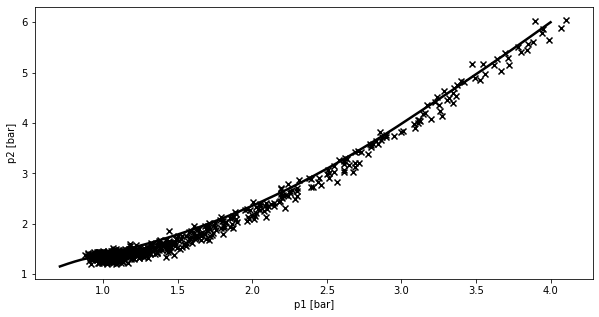

In [0]:
# Training the neural ODE


# Training parameters
n_points = 700 # number of sample points of the original system
n_steps = 1000 # number of training runs for the neural network with individually sampled batches from the total sample population
plot_freq= 200 # time frequency of plot updates after x more training runs


# creating the vector of sample points from the original ODE as synthetic data
index_np = np.arange(0, n_points, 1, dtype=np.int)
index_np = np.hstack([index_np[:, None]])
times_np = np.linspace(0, t_max, num=n_points)
times_np = np.hstack([times_np[:, None]])

times = torch.from_numpy(times_np[:, :, None]).to(z0)
obs1 = ode_true(z0, times, return_whole_sequence=True).detach()
obs1 = obs1 + torch.randn_like(obs1) * 0.06 #adding gaussian noise to the sample observations


dummy = np.zeros(shape=(n_points,2))
for i in range (len(obs1)):
        dummy[i,0] = 4

dummy2 = np.array([dummy])
dummy3 = dummy2.transpose(1,0,2) 
obs_terminal = torch.from_numpy(dummy3)
obs_terminal = torch.tensor(obs_terminal, dtype=torch.float32)
#obs_terminal = obs_terminal + torch.randn_like(obs_terminal) * 0.04 #adding gaussian noise to the sample observations
obs = torch.cat((obs1, obs_terminal), 2)

# Determine random time span within sample range t_zero and t_max 
min_delta_time = 0.1 
max_delta_time = 0.3
max_points_num = 30

# creating a training batch from the random time span
def create_batch():
    t0 = np.random.uniform(0, t_max - max_delta_time)
    t1 = t0 + np.random.uniform(min_delta_time, max_delta_time)

    idx = sorted(np.random.permutation(index_np[(times_np > t0) & (times_np < t1)])[:max_points_num])

    obs_ = obs[idx]
    ts_ = times[idx]
    return obs_, ts_

# Train Neural ODE
optimizer = torch.optim.Adam(ode_trained.parameters(), lr=0.01)
for i in range(n_steps):
    obs_, ts_ = create_batch()

    z_ = ode_trained(obs_[0], ts_, return_whole_sequence=True)
    loss = F.mse_loss(z_, obs_.detach())
   # loss__later[i] = [i,loss]
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    
    optimizer.step()
# plotting the training updates
    if i % plot_freq == 0:
        z_p = ode_trained(z02, times, return_whole_sequence=True)

        plot_trajectories(obs=[obs1], times=[times], trajs=[z_p])
        clear_output(wait=True)

Testing how well the system works for other initial conditions by simulating a trajectory in time for a state using the trained neural ODE

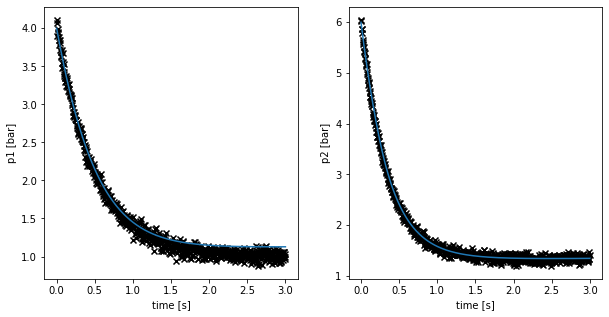

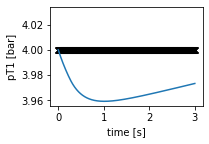

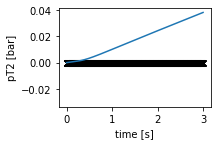

In [0]:
z02 = Variable(torch.Tensor([[4, 6,4,0]]))
z0 = Variable(torch.Tensor([[4, 6]]))
z_p = ode_trained(z02, times, return_whole_sequence=True)
#obs = ode_true(z0, times, return_whole_sequence=True)
#plotting the trajectory of true system data versus neural network model
plot_trajectories2(obs=[obs], times=[times], trajs=[z_p])

In [0]:
for param in ode_trained.parameters():
  print(param.data)

tensor([[-1.1545,  0.0888,  0.9154, -0.2689],
        [ 0.1127, -2.1180,  1.8514,  0.3482],
        [ 3.0169, -0.2072, -0.1987, -2.7376],
        [-0.2689,  3.9553, -0.1903, -4.3959]])
tensor([[ 0.5610, -0.0277, -0.6235,  0.0375],
        [-0.0738,  0.5206,  0.0912, -0.5972],
        [-0.0079,  0.0107, -0.0025, -0.0040],
        [-0.0014,  0.0034,  0.0024, -0.0009]])


In [0]:
for param in ode_trained.parameters():
  print(param.data)

tensor([[-1.,  0.,  1.,  0.],
        [ 0., -1.,  1.,  0.],
        [ 1.,  0.,  0., -1.],
        [ 0.,  1.,  0., -1.]])
tensor([[ 1.,  0., -1.,  0.],
        [ 0.,  1.,  0., -1.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])


In [0]:
for param in ode_true.parameters():
  print(param.data)

tensor([[2., 4.]])
tensor([[-2.,  0.],
        [ 0., -3.]])


In [0]:
z_p

tensor([[[4.0000, 6.0000, 4.0000, 0.0000]],

        [[3.9800, 5.9700, 4.0000, 0.0000]],

        [[3.9601, 5.9401, 4.0000, 0.0000]],

        ...,

        [[2.0018, 2.0041, 4.0000, 0.0000]],

        [[2.0018, 2.0040, 4.0000, 0.0000]],

        [[2.0018, 2.0040, 4.0000, 0.0000]]], grad_fn=<ODEAdjointBackward>)

In [0]:
loss.backward

<bound method Tensor.backward of tensor(0.0002, grad_fn=<MseLossBackward>)>

In [0]:
# Training the neural ODE


# Training parameters
n_points = 700 # number of sample points of the original system
n_steps = 1000 # number of training runs for the neural network with individually sampled batches from the total sample population
plot_freq= 200 # time frequency of plot updates after x more training runs


# creating the vector of sample points from the original ODE as synthetic data
index_np = np.arange(0, n_points, 1, dtype=np.int)
index_np = np.hstack([index_np[:, None]])
times_np = np.linspace(0, t_max, num=n_points)
times_np = np.hstack([times_np[:, None]])

times = torch.from_numpy(times_np[:, :, None]).to(z0)
obs1 = ode_true(z0, times, return_whole_sequence=True).detach()
obs1 = obs1 + torch.randn_like(obs1) * 0.01 #adding gaussian noise to the sample observations


dummy = np.zeros(shape=(n_points,2))
for i in range (len(obs1)):
        dummy[i,0] = 4

dummy2 = np.array([dummy])
dummy3 = dummy2.transpose(1,0,2) 
obs_terminal = torch.from_numpy(dummy3)
obs_terminal = torch.tensor(obs_terminal, dtype=torch.float32)
#obs_terminal = obs_terminal + torch.randn_like(obs_terminal) * 0.04 #adding gaussian noise to the sample observations
obs = torch.cat((obs1, obs_terminal), 2)

# Determine random time span within sample range t_zero and t_max 
min_delta_time = 0.1 
max_delta_time = 0.3
max_points_num = 30

# creating a training batch from the random time span
def create_batch():
    t0 = np.random.uniform(0, t_max - max_delta_time)
    t1 = t0 + np.random.uniform(min_delta_time, max_delta_time)

    idx = sorted(np.random.permutation(index_np[(times_np > t0) & (times_np < t1)])[:max_points_num])

    obs_ = obs[idx]
    ts_ = times[idx]
    return obs_, ts_

# Train Neural ODE
optimizer = torch.optim.Adam(ode_trained.parameters(), lr=0.01)


C:\Users\Gebruiker\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [0]:

obs_, ts_ = create_batch()

z_ = ode_trained(obs_[0], ts_, return_whole_sequence=True)


In [0]:
loss = F.mse_loss(z_, obs_.detach())

loss

tensor(0.0175, grad_fn=<MseLossBackward>)

In [0]:
optimizer.zero_grad()

In [0]:
loss.backward(retain_graph=True)



In [0]:
print(ode_trained.weight.grad[0,0])

AttributeError: 'NeuralODE' object has no attribute 'weight'

In [0]:
for param in ode_trained.parameters():
    print(param.data[1,0])

tensor(-0.0296)
tensor(-0.0300)


In [0]:
for param in ode_trained.parameters():
  print(param.grad.data)

tensor([[ 0.0000e+00,  6.5048e-04,  1.8500e-03, -3.9770e-07],
        [-9.9796e-04, -1.1483e-03, -3.2694e-03,  7.4242e-07],
        [-4.7493e-04, -5.4656e-04, -1.5539e-03,  3.2890e-07],
        [ 1.0555e-03,  1.2145e-03,  3.4583e-03, -7.8898e-07]])
tensor([[ 0.0000e+00,  1.0203e-03,  8.8595e-04,  9.7521e-04],
        [-1.6675e-03, -1.8327e-03, -1.5890e-03, -1.7488e-03],
        [-7.7041e-05, -8.4650e-05, -7.3715e-05, -8.1167e-05],
        [-1.7392e-04, -1.9111e-04, -1.6622e-04, -1.8300e-04]])


In [0]:
with torch.no_grad():
    print(ode_trained.parameters()[0,0])


TypeError: 'generator' object is not subscriptable

In [0]:
loss

tensor(0.0164, grad_fn=<MseLossBackward>)

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

n_dim = 5

p1 = nn.Linear(n_dim, 1)
p2 = nn.Linear(n_dim, 1)

optimizer = optim.Adam(list(p1.parameters())+list(p2.parameters()))

for i in range(4):
    dummy_loss = (p1(torch.rand(n_dim)) + p2(torch.rand(n_dim))).squeeze()
    optimizer.zero_grad()
    dummy_loss.backward()
    p1.weight.grad[:, 1:10, :, :] = 0
    optimizer.step()
    print('p1: requires_grad =', p1.weight.requires_grad, ', gradient:', p1.weight.grad)
    print('p2: requires_grad =', p2.weight.requires_grad, ', gradient:', p2.weight.grad)
    print()

    if i == 1:
        p1.weight.requires_grad = False
        p2.weight.requires_grad = True

IndexError: too many indices for tensor of dimension 2

In [0]:
p1.weight.grad[:, 0]

tensor([0.])

In [0]:
p2.weight[0,0]

tensor(-0.4472, grad_fn=<SelectBackward>)

In [0]:
p2.weight[0]

tensor([-0.4472, -0.1985, -0.1573,  0.1757, -0.3505], grad_fn=<SelectBackward>)